In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
excelFile = pd.read_excel ("UCI.xls")

# Converting excel file into CSV file
excelFile.to_csv("UCI.csv", index = None, header=True)

# Reading and Converting the output csv file into a dataframe object
cr = pd.DataFrame(pd.read_csv("UCI.csv"))

In [59]:
cr

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [7]:
for col in cr.columns:
    print(col)

ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default payment next month


In [3]:
cr_train = cr[:15000]
cr_test = cr[15000:]

In [4]:
cr_train

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
14995  14996      20000    1          2         2   24     -1     -1     -1   
14996  14997     140000    2          2         2   29      0      0      0   
14997  14998      50000    1          2         2   24      0      0     -1   
14998  14999      50000    1          3         2   27      0      0      0   
14999  15000      50000    1          2         2   28      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
14995     -2  ...       -380       -380       -380      3068         0   
14996      0  ...      45860      46264      41870      3018      3000   
14997      0  ...      28471      29309      28409      2138     44447   
14998      0  ...      45870      46975      49284      2100      2100   
14999      0  ...      42130      43011      43863      1667      1987   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
14995         0         0         0         0                           0  
14996      1356      2000      2000      1500                           0  
14997      2202      2004      1202      1051                           0  
14998      1800      2000      3100      1300                           0  
14999      1655      1710      1719      1616                           0  

[15000 rows x 25 columns]

In [4]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [88]:
log1 = LogisticRegression().fit(cr_train[["PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values, cr_train["default payment next month"].values)

In [63]:
log1.coef_, log1.intercept_

(array([[-1.31508944e-05, -8.05347380e-06, -8.06391937e-06]]),
 array([-1.11382877]))

In [8]:
import math

In [16]:
math.e

2.718281828459045

In [17]:
cr_train[cr_train["default payment next month"]==1]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
13        14      70000    1          2         2   30      1      2      2   
16        17      20000    1          1         2   24      0      0      2   
21        22     120000    2          2         1   39     -1     -1     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
14979  14980      50000    1          2         2   55      2      0      0   
14980  14981      30000    1          2         1   23      2      2      2   
14981  14982     300000    2          1         2   31     -1     -1     -1   
14988  14989      70000    2          1         1   42      0      0      0   
14990  14991     160000    1          3         2   27      1      2     -1   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
13         0  ...      66782      36137      36894      3200         0   
16         2  ...      18338      17905      19104      3200         0   
21        -1  ...          0        632        316       316       316   
...      ...  ...        ...        ...        ...       ...       ...   
14979      0  ...      15848      16026      16359      1325      1506   
14980      2  ...      30127      30525      29793      1800       150   
14981     -1  ...        316        316        316      1093       316   
14988      0  ...      43378      46664      47341      1994      1709   
14990      0  ...      15676      99436      90927         0    142848   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
13         3000      3000      1500         0                           1  
16         1500         0      1650         0                           1  
21            0       632       316         0                           1  
...         ...       ...       ...       ...                         ...  
14979       713       582       600       607                           1  
14980      2250      1000         0       700                           1  
14981       316       316       316       316                           1  
14988      1567      4000      1600      2000                           1  
14990      1800     90000      3300      3400                           1  

[3377 rows x 25 columns]

In [18]:
1+1

2

In [81]:
a=1/(1+math.e**(-log1.intercept_-np.dot(cr_train[["PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values,log1.coef_[0])))

In [89]:
a

array([0.24715778, 0.24175028, 0.23588882, ..., 0.2389693 , 0.23584796,
       0.23808776])

In [91]:
b = a>0.5
b

array([False, False, False, ..., False, False, False])

In [66]:
cr_train["bet"].value_counts()

True    15000
Name: bet, dtype: int64

In [10]:
from sklearn import metrics

In [145]:
actual1 = cr_test["default payment next month"]
b1=1/(1+math.e**(-log1.intercept_-np.dot(cr_test[["PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values,log1.coef_[0])))
peak = []
for i in range(0,10001):
    z=i/10000
    n = b1>z
    q = metrics.accuracy_score(cr_test["default payment next month"], n)
    peak.append(q)
data = {"Threshold": np.linspace(0,1,10001), "Accuracy": peak}
df1 = pd.DataFrame(data)

In [146]:
a = df1['Accuracy'].idxmax()
df1.iloc[a]

Threshold    0.247200
Accuracy     0.782733
Name: 2472, dtype: float64

In [140]:
g = b1>0.248
g

array([False, False, False, ..., False, False, False])

In [147]:
metrics.confusion_matrix(actual1, g)

array([[11741,     0],
       [ 3259,     0]])

In [120]:
x = np.linspace(0,1,1001)
x

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])

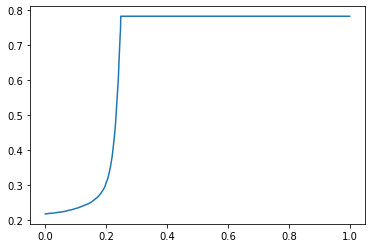

In [142]:
plt.plot(x,peak)

In [148]:
log2 = LogisticRegression().fit(cr_train[["SEX","EDUCATION","MARRIAGE","AGE"]].values, cr_train["default payment next month"].values)

In [151]:
actual = cr_test["default payment next month"]
b1=1/(1+math.e**(-log2.intercept_-np.dot(cr_test[["SEX","EDUCATION","MARRIAGE","AGE"]].values,log2.coef_[0])))
peak2 = []
for i in range(0,10001):
    z=i/10000
    n = b1>z
    q = metrics.accuracy_score(cr_test["default payment next month"], n)
    peak2.append(q)
data2 = {"Threshold": np.linspace(0,1,10001), "Accuracy": peak2}
df2 = pd.DataFrame(data2)

In [152]:
a2 = df2['Accuracy'].idxmax()
df2.iloc[a2]

Threshold    0.308500
Accuracy     0.782733
Name: 3085, dtype: float64

In [153]:
g=b1>0.308500
metrics.confusion_matrix(actual, g)

array([[11741,     0],
       [ 3259,     0]])

In [6]:
log3 = LogisticRegression().fit(cr_train[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].values, cr_train["default payment next month"].values)

In [12]:
actual = cr_test["default payment next month"]
b3=1/(1+math.e**(-log3.intercept_-np.dot(cr_test[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].values,log3.coef_[0])))
peak3 = []
for i in range(0,10001):
    z=i/10000
    n = b3>z
    q = metrics.accuracy_score(cr_test["default payment next month"], n)
    peak3.append(q)
data3 = {"Threshold": np.linspace(0,1,10001), "Accuracy": peak3}
df3 = pd.DataFrame(data3)

In [13]:
a3 = df3['Accuracy'].idxmax()
df3.iloc[a3]

Threshold    0.3844
Accuracy     0.8328
Name: 3844, dtype: float64

In [14]:
g=b3>0.3844
metrics.confusion_matrix(actual, g)

array([[11189,   552],
       [ 1956,  1303]])

In [15]:
log4 = LogisticRegression().fit(cr_train[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].values, cr_train["default payment next month"].values)

In [16]:
b4=1/(1+math.e**(-log4.intercept_-np.dot(cr_test[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].values,log4.coef_[0])))
peak4 = []
for i in range(0,10001):
    z=i/10000
    n = b4>z
    q = metrics.accuracy_score(cr_test["default payment next month"], n)
    peak4.append(q)
data4 = {"Threshold": np.linspace(0,1,10001), "Accuracy": peak4}
df4 = pd.DataFrame(data4)

In [17]:
a4 = df4['Accuracy'].idxmax()
df4.iloc[a4]

Threshold    0.597700
Accuracy     0.782733
Name: 5977, dtype: float64

In [18]:
g=b4>0.3844
metrics.confusion_matrix(actual, g)

array([[4618, 7123],
       [1200, 2059]])

In [19]:
one = cr_train[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]
two = cr_train["default payment next month"]

In [22]:
model = QuadraticDiscriminantAnalysis()
model.fit(one, two)

QuadraticDiscriminantAnalysis()

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

In [42]:
cr_test

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
15000  15001      50000    2          1         2   22      0      0      0   
15001  15002      80000    2          1         2   24     -1      0      0   
15002  15003      90000    2          2         1   28      0      0      0   
15003  15004      50000    2          2         1   27     -1     -1     -1   
15004  15005     270000    2          2         1   32      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
15000     -1  ...       2000          0          0     10000      1175   
15001      0  ...      58025      59527      60778      5000      4176   
15002      0  ...      24364      19726      19166      1500      1500   
15003     -1  ...        492        492        470       493       493   
15004      0  ...     123905     105064     105600      6500      6843   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
15000      2000         0         0         0                           1  
15001      4000      3000      2141      3000                           0  
15002      1508      1000      1000       800                           0  
15003       493       493       471      7739                           0  
15004      6284      3617      3716      4035                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[15000 rows x 25 columns]

In [35]:
new = [cr_test["PAY_0"][29999],cr_test["PAY_2"][15000],cr_test["PAY_3"][15000],cr_test["PAY_4"][15000],cr_test["PAY_5"][15000],cr_test["PAY_6"][15000]]
new

[0, 0, 0, -1, -1, -2]

In [53]:
cr_test=cr_test.reset_index()
cr_test

level_0  index     ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  \
0            0  15000  15001      50000    2          1         2   22      0   
1            1  15001  15002      80000    2          1         2   24     -1   
2            2  15002  15003      90000    2          2         1   28      0   
3            3  15003  15004      50000    2          2         1   27     -1   
4            4  15004  15005     270000    2          2         1   32      0   
...        ...    ...    ...        ...  ...        ...       ...  ...    ...   
14995    14995  29995  29996     220000    1          3         1   39      0   
14996    14996  29996  29997     150000    1          3         2   43     -1   
14997    14997  29997  29998      30000    1          2         2   37      4   
14998    14998  29998  29999      80000    1          3         1   41      1   
14999    14999  29999  30000      50000    1          2         1   46      0   

       PAY_2  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0          0  ...       2000          0          0     10000      1175   
1          0  ...      58025      59527      60778      5000      4176   
2          0  ...      24364      19726      19166      1500      1500   
3         -1  ...        492        492        470       493       493   
4          0  ...     123905     105064     105600      6500      6843   
...      ...  ...        ...        ...        ...       ...       ...   
14995      0  ...      88004      31237      15980      8500     20000   
14996     -1  ...       8979       5190          0      1837      3526   
14997      3  ...      20878      20582      19357         0         0   
14998     -1  ...      52774      11855      48944     85900      3409   
14999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0          2000         0         0         0                           1  
1          4000      3000      2141      3000                           0  
2          1508      1000      1000       800                           0  
3           493       493       471      7739                           0  
4          6284      3617      3716      4035                           0  
...         ...       ...       ...       ...                         ...  
14995      5003      3047      5000      1000                           0  
14996      8998       129         0         0                           0  
14997     22000      4200      2000      3100                           1  
14998      1178      1926     52964      1804                           1  
14999      1430      1000      1000      1000                           1  

[15000 rows x 27 columns]

model.predict([new])[0]

In [32]:
def QDA(x):
    c = model.predict([x])[0]
    return(c)

In [54]:
guesses = []
for i in range(len(cr_test)):
    new = [cr_test["PAY_0"][i],cr_test["PAY_2"][i],cr_test["PAY_3"][i],cr_test["PAY_4"][i],cr_test["PAY_5"][i],cr_test["PAY_6"][i]]
    j = QDA(new)
    guesses.append(j)

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalys

In [55]:
metrics.confusion_matrix(actual, guesses)

array([[9930, 1811],
       [1804, 1455]])

In [51]:
len(guesses)

14999

In [56]:
metrics.accuracy_score(actual,guesses)

0.759

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [58]:
mecha = LinearDiscriminantAnalysis()
mecha.fit(one, two)

LinearDiscriminantAnalysis()

In [59]:
def LDA(x):
    c = mecha.predict([x])[0]
    return(c)

In [60]:
robo = []
for i in range(len(cr_test)):
    new = [cr_test["PAY_0"][i],cr_test["PAY_2"][i],cr_test["PAY_3"][i],cr_test["PAY_4"][i],cr_test["PAY_5"][i],cr_test["PAY_6"][i]]
    j = LDA(new)
    robo.append(j)

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted w

In [61]:
metrics.confusion_matrix(actual, robo)

array([[11498,   243],
       [ 2561,   698]])

In [62]:
metrics.accuracy_score(actual,robo)

0.8130666666666667

In [63]:
log5 = LogisticRegression().fit(cr_train[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values, cr_train["default payment next month"].values)

In [64]:
b5=1/(1+math.e**(-log5.intercept_-np.dot(cr_test[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values,log5.coef_[0])))
peak5 = []
for i in range(0,10001):
    z=i/10000
    n = b5>z
    q = metrics.accuracy_score(cr_test["default payment next month"], n)
    peak5.append(q)
data5 = {"Threshold": np.linspace(0,1,10001), "Accuracy": peak5}
df5 = pd.DataFrame(data5)

In [65]:
a5 = df5['Accuracy'].idxmax()
df5.iloc[a5]

Threshold    0.272800
Accuracy     0.782733
Name: 2728, dtype: float64

In [66]:
g=b5>0.3844
metrics.confusion_matrix(actual, g)

array([[11741,     0],
       [ 3259,     0]])

In [67]:
log6 = LogisticRegression().fit(cr_train[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values, cr_train["default payment next month"].values) 

In [68]:
b6=1/(1+math.e**(-log6.intercept_-np.dot(cr_test[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values,log6.coef_[0])))
peak6 = []
for i in range(0,10001):
    z=i/10000
    n = b6>z
    q = metrics.accuracy_score(cr_test["default payment next month"], n)
    peak6.append(q)
data6 = {"Threshold": np.linspace(0,1,10001), "Accuracy": peak6}
df6 = pd.DataFrame(data6)

In [69]:
a6 = df6['Accuracy'].idxmax()
df6.iloc[a6]

Threshold    0.5001
Accuracy     0.7864
Name: 5001, dtype: float64

In [70]:
g=b6>0.5001
metrics.confusion_matrix(actual, g)

array([[11722,    19],
       [ 3185,    74]])

In [74]:
log7 = LogisticRegression().fit(cr_train[["EDUCATION","PAY_4","PAY_5","PAY_6","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values, cr_train["default payment next month"].values) 

In [76]:
b7=1/(1+math.e**(-log7.intercept_-np.dot(cr_test[["EDUCATION","PAY_4","PAY_5","PAY_6","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values,log7.coef_[0])))
peak7 = []
for i in range(0,10001):
    z=i/10000
    n = b7>z
    q = metrics.accuracy_score(cr_test["default payment next month"], n)
    peak7.append(q)
data7 = {"Threshold": np.linspace(0,1,10001), "Accuracy": peak7}
df7 = pd.DataFrame(data6)

In [77]:
a7 = df7['Accuracy'].idxmax()
df7.iloc[a7]

Threshold    0.5001
Accuracy     0.7864
Name: 5001, dtype: float64

In [78]:
g=b7>0.5001
metrics.confusion_matrix(actual, g)

array([[11523,   218],
       [ 2822,   437]])

In [80]:
log8 = LogisticRegression().fit(cr_train[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].values, cr_train["default payment next month"].values)
b8=1/(1+math.e**(-log8.intercept_-np.dot(cr_test[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].values,log8.coef_[0])))
peak8 = []
for i in range(0,10001):
    z=i/10000
    n = b8>z
    q = metrics.accuracy_score(cr_test["default payment next month"], n)
    peak8.append(q)
data8 = {"Threshold": np.linspace(0,1,10001), "Accuracy": peak8}
df8 = pd.DataFrame(data8)

In [81]:
a8 = df8['Accuracy'].idxmax()
df8.iloc[a8]

Threshold    0.597800
Accuracy     0.782733
Name: 5978, dtype: float64

In [82]:
g=b8>0.5001
metrics.confusion_matrix(actual, g)

array([[11660,    81],
       [ 3236,    23]])

In [83]:
log9 = LogisticRegression().fit(cr_train[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values, cr_train["default payment next month"].values) 

In [85]:
b9=1/(1+math.e**(-log9.intercept_-np.dot(cr_test[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values,log9.coef_[0])))
peak9 = []
for i in range(0,10001):
    z=i/10000
    n = b9>z
    q = metrics.accuracy_score(cr_test["default payment next month"], n)
    peak9.append(q)
data9 = {"Threshold": np.linspace(0,1,10001), "Accuracy": peak9}
df9 = pd.DataFrame(data6)

In [86]:
a9 = df9['Accuracy'].idxmax()
df9.iloc[a9]

Threshold    0.5001
Accuracy     0.7864
Name: 5001, dtype: float64

In [87]:
g=b9>0.5001
metrics.confusion_matrix(actual, g)

array([[11722,    19],
       [ 3185,    74]])

In [90]:
log10 = LogisticRegression().fit(cr_train[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values, cr_train["default payment next month"].values) 

In [91]:
b10=1/(1+math.e**(-log10.intercept_-np.dot(cr_test[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].values,log10.coef_[0])))
peak10 = []
for i in range(0,10001):
    z=i/10000
    n = b10>z
    q = metrics.accuracy_score(cr_test["default payment next month"], n)
    peak10.append(q)
data10 = {"Threshold": np.linspace(0,1,10001), "Accuracy": peak10}
df10 = pd.DataFrame(data10)

In [92]:
a10 = df10['Accuracy'].idxmax()
df10.iloc[a10]

Threshold    0.3706
Accuracy     0.8308
Name: 3706, dtype: float64

In [93]:
g=b10>0.3706
metrics.confusion_matrix(actual, g)

array([[11218,   523],
       [ 2015,  1244]])

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
one = cr_train[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]
two = cr_train["default payment next month"]

In [7]:
fit1=KNeighborsClassifier(n_neighbors=3).fit(one, two)

In [8]:
g = fit1.predict(cr_test[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].values)

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [9]:
metrics.confusion_matrix(actual, g)

NameError: name 'metrics' is not defined

In [102]:
metrics.accuracy_score(actual,g)

0.8046666666666666

In [109]:
fit2=KNeighborsClassifier(n_neighbors=5).fit(one, two)
g2 = fit2.predict(cr_test[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].values)
print(metrics.confusion_matrix(actual, g2))
print(metrics.accuracy_score(actual,g2))

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[11202   539]
 [ 2215  1044]]
0.8164


/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.w

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.w

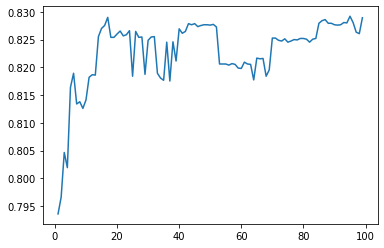

In [112]:
acc=[]
for k in range(1,100):
    fit=KNeighborsClassifier(n_neighbors=k).fit(one, two)
    g = fit.predict(cr_test[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].values)
    a=metrics.accuracy_score(actual,g)
    acc.append(a)
plt.plot(range(1,100),acc)

In [113]:
fit2=KNeighborsClassifier(n_neighbors=45).fit(one, two)
g2 = fit2.predict(cr_test[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].values)
print(metrics.confusion_matrix(actual, g2))
print(metrics.accuracy_score(actual,g2))

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[11270   471]
 [ 2111  1148]]
0.8278666666666666
